In [9]:
# Mengimport Library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray 

In [10]:
#   Fungsi untuk memberikan noise pada gambar yg jernih
def add_salt_and_pepper_noise(image, proporsi):
    noisy_image = image.copy()                      # Copy image
    noise = np.zeros(image.shape[:2], np.uint8)     # Membuat array kosong untuk menampung hasil noise
    cv2.randu(noise, 0, 255)                        # Memanggil fungsi cv2.randu untuk menghasilkan noise salt and pepper

    # Mengubah piksel menjadi nilai putih atau hitam berdasarkan proporsi
    noisy_image[noise < proporsi * 255 / 2] = 0  # Mengubah piksel menjadi hitam (noise pepper)
    noisy_image[noise > 255 - proporsi * 255 / 2] = 255  # Mengubah piksel menjadi putih (noise salt)

    return noisy_image

proporsi = 0.15 # Proporsi noise yang diinginkan 

Shape citra 1 :  (1080, 1080)
Shape citra 2 :  (1080, 1080)


Text(0.5, 1.0, 'Citra 2')

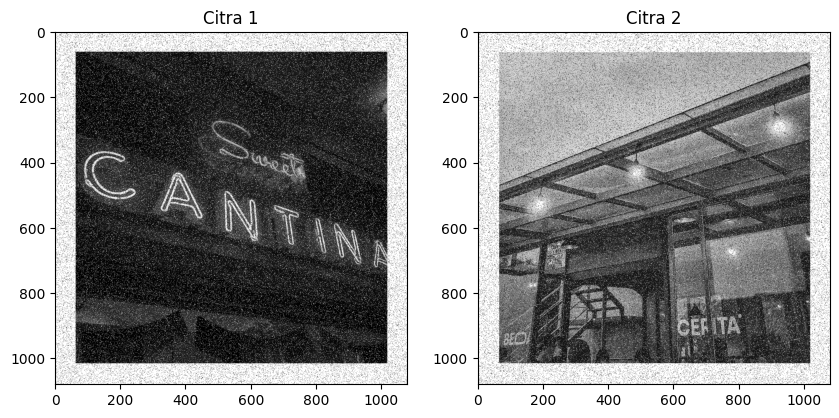

In [11]:
citra1 = imread(fname="images/Sweet.jpg")           # Membaca citra dengan nama file "Sweet.jpg" menggunakan fungsi imread()
citra1 = cv2.cvtColor(citra1, cv2.COLOR_RGB2GRAY)   # Konversi citra menjadi citra skala abu-abu 
citra1_noisy = add_salt_and_pepper_noise(citra1, proporsi)

citra2 = imread(fname="images/Story.png")       # Membaca citra dengan nama file "Story.png"" menggunakan fungsi imread()
citra2 = cv2.cvtColor(citra2, cv2.COLOR_RGB2GRAY)   # Konversi citra menjadi citra skala abu-abu 
citra2_noisy = add_salt_and_pepper_noise(citra2, proporsi)

# Print informasi dimensi citra
print('Shape citra 1 : ', citra1.shape)
print('Shape citra 2 : ', citra2.shape)

# Membuat figure subplot  dengan ukuran 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

# Menampilkan citra 1 dan citra 2
ax[0].imshow(citra1_noisy, cmap = 'gray')
ax[0].set_title("Citra 1")
ax[1].imshow(citra2_noisy, cmap = 'gray')
ax[1].set_title("Citra 2")

In [12]:
#   CODE ASAL MATLAB

#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

In [13]:
copyCitra1 = citra1_noisy.copy()            # Membuat salinan dari citra citra1 dan citra2
copyCitra2 = citra2_noisy.copy()

m1, n1 = copyCitra1.shape                   # Mengambil dimensi baris (m1) dan dimensi kolom (n1) dari copyCitra1
output1 = np.empty([m1, n1])                # Membuat matriks kosong dengan ukuran m1 baris dan n1 kolom
m2, n2 = copyCitra2.shape                   # Mengambil dimensi baris (m2) dan dimensi kolom (n2) dari copyCitra2
output2 = np.empty([m2, n2])                # Membuat matriks kosong dengan ukuran m2 baris dan n2 kolom

# Print informasi dimensi citra copyCitra1 dan dimensi citra output output1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

# Print nilai m1 dan n1 untuk memberikan informasi tentang jumlah baris dan jumlah kolom secara terpisah
print('m1 : ', m1)
print('n1 : ', n1)
print()

# Print informasi dimensi citra copyCitra2 dan dimensi citra output output2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 3 : ', output2.shape)

# Print nilai m1 dan n1 untuk memberikan informasi tentang jumlah baris dan jumlah kolom secara terpisah
print('m2 : ',m2)
print('n2 : ',n2)
print()

Shape copy citra 1 :  (1080, 1080)
Shape output citra 1 :  (1080, 1080)
m1 :  1080
n1 :  1080

Shape copy citra 2 :  (1080, 1080)
Shape output citra 3 :  (1080, 1080)
m2 :  1080
n2 :  1080



In [14]:
#   FILTERING INPUT 1

#Melakukan iterasi pada setiap baris dari 0 hingga m1-1
for baris in range(0, m1-1):
    #Melakukan iterasi pada setiap kolom dari 0 hingga n1-1.
    for kolom in range(0, n1-1):
        
        #Menginisialisasi variabel a1 dengan nilai baris & variabel b1 dengan nilai kolom
        a1 = baris
        b1 = kolom
        
        #Membentuk sebuah array numpy arr dengan elemen-elemen sekitar dari copyCitra1
        arr = np.array([copyCitra1[a1-1, b1-1], copyCitra1[a1-1, b1], copyCitra1[a1, b1+1], \
            copyCitra1[a1, b1-1], copyCitra1[a1, b1+1], copyCitra1[a1+1, b1-1],  \
            copyCitra1[a1+1, b1], copyCitra1[a1+1, b1+1]])
        
        #Menghitung nilai minimum dan maksimum dari array 
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);    
            
        #Jika nilai piksel pada posisi baris, kolom dalam copyCitra1 lebih kecil dari minPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi minPiksel.  
        if copyCitra1[baris, kolom] < minPiksel :
            output1[baris, kolom] = minPiksel
        else :
            #Jika nilai piksel pada posisi baris, kolom dalam copyCitra1 lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output1 diubah menjadi maksPiksel.
            if copyCitra1[baris, kolom] > maksPiksel :
                output1[baris, kolom] = maksPiksel
            #Jika nilai piksel pada posisi baris, kolom dalam copyCitra1 tidak lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output1 diubah menjadi nilai piksel pada posisi baris, kolom dalam copyCitra1.
            else :
                output1[baris, kolom] = copyCitra1[baris, kolom]

In [15]:
#   FILTERING INPUT 2

#Melakukan iterasi pada setiap baris dari 0 hingga m2-1
for baris in range(0, m2-1):
    #Melakukan iterasi pada setiap kolom dari 0 hingga n2-1.
    for kolom in range(0, n2-1):
        
        #Menginisialisasi variabel a2 dengan nilai baris & variabel b2 dengan nilai kolom
        a2 = baris
        b2 = kolom
        
        #Membentuk sebuah array numpy arr dengan elemen-elemen sekitar dari copyCitra2
        arr = np.array([copyCitra2[a2-1, b2-1], copyCitra2[a2-1, b2], copyCitra2[a2, b2+1], \
            copyCitra2[a2, b2-1], copyCitra2[a2, b2+1], copyCitra2[a2+1, b2-1],  \
            copyCitra2[a2+1, b2], copyCitra2[a2+1, b2+1]])
        
        #Menghitung nilai minimum dan maksimum dari array 
        minPiksel = np.amin(arr);        
        maksPiksel = np.amax(arr);   
         
        #Jika nilai piksel pada posisi baris, kolom dalam copyCitra2 lebih kecil dari minPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi minPiksel.  
        if copyCitra2[baris, kolom] < minPiksel :
            output2[baris, kolom] = minPiksel
        else :
            #Jika nilai piksel pada posisi baris, kolom dalam copyCitra2 lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi maksPiksel.
            if copyCitra2[baris, kolom] > maksPiksel :
                output2[baris, kolom] = maksPiksel
            #Jika nilai piksel pada posisi baris, kolom dalam copyCitra2 tidak lebih besar dari maksPiksel, maka nilai piksel pada posisi yang sama dalam output2 diubah menjadi nilai piksel pada posisi baris, kolom dalam copyCitra2.
            else :
                output2[baris, kolom] = copyCitra2[baris, kolom]

Text(0.5, 1.0, 'Output Citra 2')

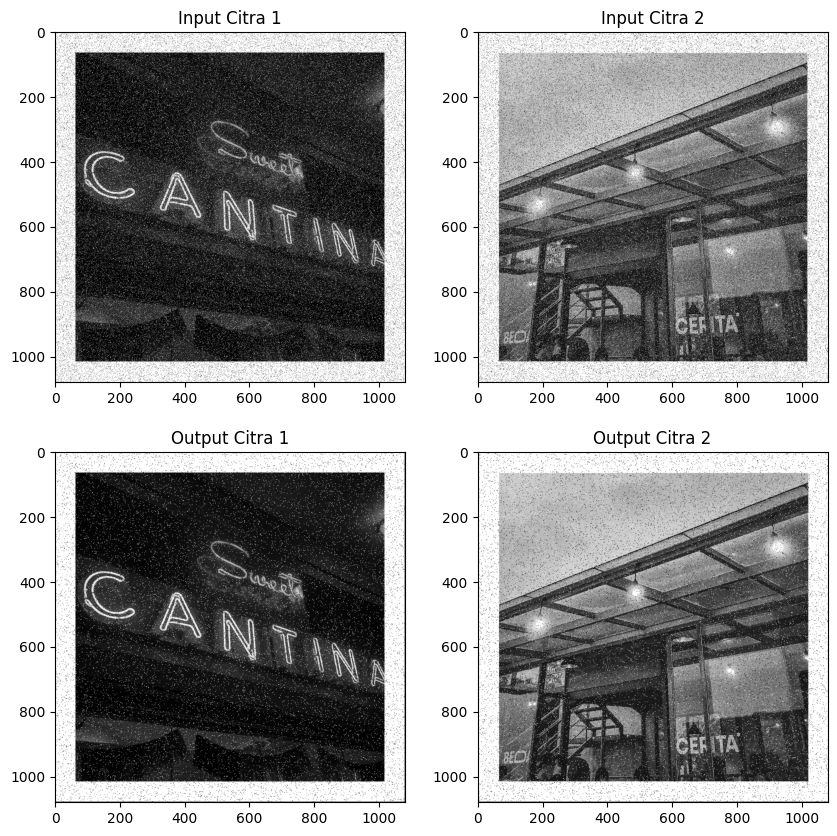

In [16]:
#   PLOTTING IMAGE
fig, axes = plt.subplots(2, 2, figsize=(10, 10))    # Membuat figure subplot  dengan ukuran 2 baris dan 2 kolom
ax = axes.ravel()                                   # Meratakan array axes menjadi satu dimensi.

ax[0].imshow(citra1_noisy, cmap = 'gray')           # Menampilkan hasil input citra 1
ax[0].set_title("Input Citra 1")

ax[1].imshow(citra2_noisy, cmap = 'gray')           # Menampilkan hasil input citra 2
ax[1].set_title("Input Citra 2")

ax[2].imshow(output1, cmap = 'gray')                # Menampilkan hasil output citra 1
ax[2].set_title("Output Citra 1")

ax[3].imshow(output2, cmap = 'gray')                # Menampilkan hasil output citra 2
ax[3].set_title("Output Citra 2")